In [335]:
%%HTML
<style>
    /* style for presentation only */
    .reveal .rendered_html table { font-size: 24px }
</style> 

In [252]:
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Data Science with Python

Andrew Bolster 
* [bolster.online](https://bolster.online)
* Tweets [@bolster](https://twitter.bolster.online)
* GitHubs at [andrewbolster](https://github.com/andrewbolster)
* Works at [Sensum Co](https://sensum.co) **We're hiring DS/DevOps**
* Plays at [Farset Labs](https://www.farsetlabs.org.uk)
* **[THIS NOTEBOOK IS AT present.bolster.online](http://present.bolster.online)**
* [Also available in source at presentgh.bolster.online](http://presentgh.bolster.online)


# Zee Plan

* Bit about me
* A bit about the local open data and data science ecosystem
* What I think you know
* Repeat last weeks tasks in a fraction of the time
* Throw you in the deep end with a data cleaning exercise.

# About me

* MEng Electronics & Software Engineering (QUB)
* PhD Autonomous Systems (DSTL/MoD/NATO/UoL)
* Charity Founder / Director (Farset Labs)
* Open Data Activist (DF Open Data Advisory Panellist) 
* STEM Educator (CoderDojo, CodeCoop, STEMNET)
* Data Scientist (Sensum/Free time)


# Data Science in Northern Ireland

Data Science: "Turning Multi-modal data into actionable insights"


AKA: "Turning Numbers into Other Numbers, and occasionally graphs"

![](dozens.gif)

## Vibrant Corporate Ecosystem

* [Analytics Engines](http://www.analyticsengines.com/)
* [AquaQ Analytics](https://www.aquaq.co.uk/)
* [Kainos](https://www.kainos.com/)
* [Flexera|BDNA](https://www.bdna.com/category/flexera/)
* [First Derivitives](https://www.firstderivatives.com/)
* [Neueda](http://www.neueda.com/)
* [Sensum](https://sensum.co/)
* [BrainwaveBank](https://www.brainwavebank.com/)
* Many Many _Many_ More

## Open Source / Meetup Ecosystem too
***Hint: If you really want to learn data science, go to/get involved in some of these***

* [IoT Belfast](https://www.meetup.com/IOTBelfast/) - _TOMORROW_
* [IoT Alliance](https://www.meetup.com/Belfast-New-Technology-Meetup/)
* [PyBelfast](https://www.meetup.com/PyBelfast/)
* [Code Co-op NI](https://www.meetup.com/CodeCoop-NI/)
* [Data Art Belfast](https://www.meetup.com/Data-Art-Belfast/)
* [Big Data Belfast Breakout](https://www.meetup.com/Big-Data-Belfast-Breakout/)
* [Women Who Code Belfast](https://www.meetup.com/Women-Who-Code-Belfast/)
* [Docker Belfast](https://www.meetup.com/Docker-Belfast/)
* [DevOps Belfast](https://www.meetup.com/DevOps-Belfast/)
* [DevSecOps Belfast](https://www.meetup.com/devsecops-belfast/)


***Hint the Second: These are the _best_ ways to get a job in the field***

## Engaged local Government/ComVol support

* [OpenData NI](https://www.opendatani.gov.uk/)
* [DetailData](http://data.nicva.org/)



## Other People Actually Know about what we're doing in NI

* [Big Data Belfast Conference](http://www.bigdatabelfast.com/)
* [ODCamp](http://odcamp.co.uk/)

![](careers_1.jpg)

![](fhrs.jpg)

# Enough Waffle, show me the numbers!
## What I think you know

* CSV / JSON / XML File Structures
* Python Standard Library
* Open Data NI
* Stack Overflow

## Setup/Requirements
```bash
conda install pandas numpy geopandas shapely
pip install ckanapi
```

I would advise you grab this notebook from here instead of frantically trying to keep up...
* **[present.bolster.online](http://present.bolster.online)**
* [Also available in source at presentgh.bolster.online](http://presentgh.bolster.online)

In [1]:
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
graph_figsize = (10,6)                    # I'm forgetful and lazy

%matplotlib nbagg
                                          # Jupyter Magics!

from ckanapi import RemoteCKAN            # Access to ODNI
import pandas as pd                       # Pandas shorthand
import numpy as np                        # Maths
import os                                 # System Operations

# Python Reminders
## Variables and Math

In [3]:
variable = 5
print(variable)

5


Basic Math Operations

In [4]:
print(variable * 5)

25


## Tricky "Math" Operations

In [5]:
output = variable * "na" + ", batman"
# Can guess what it is yet?

In [257]:
print(output)

nanananana, batman


## Loops and Lists
Loops are good.

In [258]:
for i in range(8):
    for j in range(2):
        print('na,', end='')
    print()
print('batman!')

na,na,
na,na,
na,na,
na,na,
na,na,
na,na,
na,na,
na,na,
batman!


Lists are things

In [259]:
variable = ['thing 1','thing 2']
print(variable)

['thing 1', 'thing 2']


Lists are things that you can loop on

In [260]:
variable = ['thing 1','thing 2']
for thing in variable:
    print("This is "+thing)

This is thing 1
This is thing 2


## Loopy Lists
You can combine lists and loops in "List Comprehensions"

In [261]:
print(['This is '+thing for thing in variable])

['This is thing 1', 'This is thing 2']


In [262]:
my_powers = [2**i for i in range(6)]
print(my_powers)

[1, 2, 4, 8, 16, 32]


## Files
You can do fancy things with file contexts

In [263]:
with open('writer.txt', 'w') as file:
    file.write('Hi there from python')

In [264]:
with open('writer.txt', 'r') as same_file:
    print(same_file.readlines())

['Hi there from python']


# Pandas

* It's MASSIVE
* It's PAWRFUL
* It's sometimes fiddly.

But it's awesome so lets just plod on.

I will be moving fast so keep up and ask questions!

In [265]:
# DataFrame Creation Example- Dict of Lists, colwise
d = {'col1': [1,2,3,4], 'col2': [5,6,7,8]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,5
1,2,6
2,3,7
3,4,8


In [266]:
# List of Tuples
d = [(1, 2 ,3 ,4), (5, 6, 7, 8)]
df = pd.DataFrame(data=d)
df

,0,1,2,3
0,1,2,3,4
1,5,6,7,8


In [267]:
# Dict of Lists; rowwise
d = {'row1': [1,2,3,4], 'row2': [5,6,7,8]}
df = pd.DataFrame.from_dict(d, orient='index')
df

,0,1,2,3
row1,1,2,3,4
row2,5,6,7,8


In [268]:
# Add Column
df[4] = [10,10]
df

,0,1,2,3,4
row1,1,2,3,4,10
row2,5,6,7,8,10


In [269]:
# Add Row
df.loc['row0'] = [10,10,10,10,0]
df

,0,1,2,3,4
row1,1,2,3,4,10
row2,5,6,7,8,10
row0,10,10,10,10,0


In [270]:
# Pandas will fill the row/col if you just give it one value
df['somevalue'] = 1
df

,0,1,2,3,4,somevalue
row1,1,2,3,4,10,1
row2,5,6,7,8,10,1
row0,10,10,10,10,0,1


In [271]:
# Transpose
df.T

,row1,row2,row0
0,1,5,10
1,2,6,10
2,3,7,10
3,4,8,10
4,10,10,0
somevalue,1,1,1


In [272]:
# Drop Row
df = df.drop('row2')
df

,0,1,2,3,4,somevalue
row1,1,2,3,4,10,1
row0,10,10,10,10,0,1


In [273]:
# Drop Column
df = df.drop('somevalue', axis=1)
df

,0,1,2,3,4
row1,1,2,3,4,10
row0,10,10,10,10,0


In [274]:
# Rename columns
df.rename(columns={0:'zero'})


,zero,1,2,3,4
row1,1,2,3,4,10
row0,10,10,10,10,0


In [275]:
#Note: Many pandas operations only return a 'view', doesn't change
df

,0,1,2,3,4
row1,1,2,3,4,10
row0,10,10,10,10,0


In [276]:
# Rename in place
df.rename(columns={0:'zero'}, inplace=True)
df

,zero,1,2,3,4
row1,1,2,3,4,10
row0,10,10,10,10,0


In [277]:
# Create new, useful, columns
df['subtotal'] = df.sum(axis=1)
df

,zero,1,2,3,4,subtotal
row1,1,2,3,4,10,20
row0,10,10,10,10,0,40


<IPython.core.display.Javascript object>


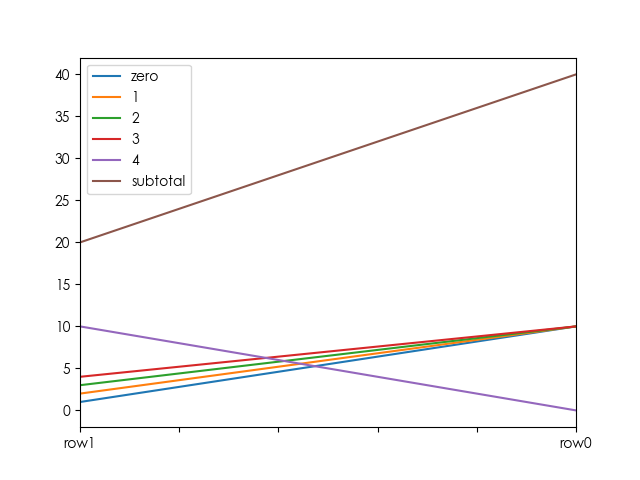

In [278]:
# Make meaningless graphs!
df.plot()

# And now for something familiar in an unfamiliar way
## [The Food Premise Hygine Ratings](https://www.opendatani.gov.uk/dataset/food-premise-hygiene-ratings)

You lot should be experts at this, so feel free to correct me when it gets boring!

In [279]:
# This is some magic that you don't need to worry about, but ask me about it at the end

def dataset_generator(resource_id): 
    """A Generator that yields records from a given dataset resource id"""
    ua = 'ItsBolster/29.5 (+http://farsetlabs.org.uk/)'
    demo = RemoteCKAN('https://www.opendatani.gov.uk/', user_agent=ua)
    offset=0
    while True:
        datastore_page = demo.action.datastore_search(resource_id=resource_id, offset=offset)
        if not datastore_page['records']:
            raise StopIteration
        for record in datastore_page['records']:
            yield record   ## Execution is passed back to the caller here
            offset+=1

In [280]:
# Why Pandas is Awesome
df = pd.DataFrame.from_records(dataset_generator('3d998bd3-ecbe-4087-a653-ea11448ea53f'))
df.head()

,_id,buildingid,establishmentaddressline1,establishmentaddressline2,establishmentaddressline3,establishmentaddressline4,establishmentname,inspectiondate,latitude,longitude,postcode,rating
0,1,185003495,,,1 Corry Place,Belfast,Heyn Group,2012-08-23T00:00:00,375525,334581,BT3 9AH,5
1,2,185746347,Rosemary Presbyterian Church,,26-36 North Circular Road,Belfast,Rosemary Lunch Club,2014-10-21T00:00:00,378213,332938,BT15 5HD,5
2,3,185001807,,,37 Montgomery Street,Belfast,John Ross & Co Auctioneers,2015-03-19T00:00:00,373992,334055,BT1 4NX,4
3,4,185000821,,,108 Donegall Street,Belfast,The Maverick/Boom Box,2014-11-03T00:00:00,374852,333733,BT1 2GX,5
4,5,187129705,,,1 Union Street,,Maverick,2014-02-13T00:00:00,378435,281262,BT1 2JF,4


## Tasks
1. Print a list containing all field names in the header
2. Print a list of all postcodes
3. Print a list of all establishment names that do not have a
recorded postcode.
4. Print a list of all establishment names that are missing any
item of information

### Print a list containing all field names in the header

In [281]:
list(df.keys())

['_id',
 'buildingid',
 'establishmentaddressline1',
 'establishmentaddressline2',
 'establishmentaddressline3',
 'establishmentaddressline4',
 'establishmentname',
 'inspectiondate',
 'latitude',
 'longitude',
 'postcode',
 'rating']

### Print a list of all postcodes

In [282]:
postcodes = sorted(df['postcode'].unique())
print(postcodes)

['', 'BT1 1AA', 'BT1 1AL', 'BT1 1BL', 'BT1 1DA', 'BT1 1DD', 'BT1 1DJ', 'BT1 1DL', 'BT1 1DN', 'BT1 1EA', 'BT1 1FB', 'BT1 1FE', 'BT1 1FF', 'BT1 1FG', 'BT1 1FJ', 'BT1 1FP', 'BT1 1FY', 'BT1 1GA', 'BT1 1GB', 'BT1 1GH', 'BT1 1GJ', 'BT1 1HB', 'BT1 1HD', 'BT1 1HE', 'BT1 1HL', 'BT1 1HS', 'BT1 1HU', 'BT1 1HY', 'BT1 1JE', 'BT1 1JL', 'BT1 1JN', 'BT1 1JQ', 'BT1 1LA', 'BT1 1LE', 'BT1 1LS', 'BT1 1LT', 'BT1 1LU', 'BT1 1NA', 'BT1 1NB', 'BT1 1ND', 'BT1 1PE', 'BT1 1PG', 'BT1 1QA', 'BT1 1QB', 'BT1 1QN', 'BT1 1RB', 'BT1 1RD', 'BT1 2AA', 'BT1 2AB', 'BT1 2BD', 'BT1 2BE', 'BT1 2DX', 'BT1 2DY', 'BT1 2DZ', 'BT1 2ED', 'BT1 2FF', 'BT1 2FH', 'BT1 2FJ', 'BT1 2GP', 'BT1 2GT', 'BT1 2GW', 'BT1 2GX', 'BT1 2GY', 'BT1 2JD', 'BT1 2JF', 'BT1 2JG', 'BT1 2JH', 'BT1 2LA', 'BT1 2LB', 'BT1 2LD', 'BT1 2LH', 'BT1 2LQ', 'BT1 2LR', 'BT1 2LZ', 'BT1 2NB', 'BT1 2NJ', 'BT1 2NQ', 'BT1 3AA', 'BT1 3AF', 'BT1 3AH', 'BT1 3AJ', 'BT1 3AL', 'BT1 3BG', 'BT1 3BH', 'BT1 3BS', 'BT1 3BT', 'BT1 3BU', 'BT1 3EA', 'BT1 3EB', 'BT1 3EQ', 'BT1 3ES', 'BT1 

***Bonus Round***, top postcodes, alphabetically

In [283]:
df.groupby('postcode').size().sort_values(ascending=False).head(6)

postcode
BT1 3NQ     86
            33
BT1 4QG     23
BT15 1WA    19
BT1 1HL     18
BT1 1DD     18
dtype: int64

**Bonus Bonus Round**, there are many ways to do *similar* things
Top postcodes, by order of 1st appearance in dataset

In [284]:
df['postcode'].value_counts(ascending=False)[:6]

BT1 3NQ     86
            33
BT1 4QG     23
BT15 1WA    19
BT3 9JL     18
BT1 1HL     18
Name: postcode, dtype: int64

### Print a list of all establishment names that do not have a recorded postcode.

In [285]:
df[df['postcode'] == '']['establishmentname']

101                           El Divino
294                    Gibsons Butchers
533                            Van Shop
540                St Galls Coffee Shop
607                 Glenbrook Surestart
672                 Glenbrook Surestart
767                        Costa Coffee
774                            Holohans
776            Cafe Krem Students Union
972                      Royal Day Care
1025                Glenbrook Surestart
1030    Malone Kindergarden - Simply Me
1500                         Top Centra
1531                          Russell's
1763                      The Dock Cafe
2154                    Select Catering
2158                  The Bus Stop Cafe
2161    Firths Traditional Fish & Chips
2162                    Attridge & Cole
2165                    Bernies Burgers
2170                          Top Scoff
2263              Campbell McCleave Ltd
2290          First Presbyterian Church
2540        Pizza Hut (Victoria Square)
2541     TGI Fridays  (Victoria Square)


### Print a list of all establishment names that are missing any item of information

Assumptions:
* "Any" information includes optional address fields

In [286]:
df[df.isin((None,'')).any(axis=1)]['establishmentname']

0                                              Heyn Group
1                                     Rosemary Lunch Club
2                              John Ross & Co Auctioneers
3                                   The Maverick/Boom Box
4                                                Maverick
5                          Windsor Recreation & Social Cl
6                                         The Chester Inn
7                                           The Sportsman
8                                    City Hibernians Club
9                        Forthriver Bowling & Tennis Club
10                         Shawsbridge Sports Association
11                                       Muriels Cafe Bar
12                                               MCGLONES
13                                       The Corner House
14                                    Ewarts Bowling Club
15                             Ligoniel Working Mens Club
16                                           DUNMURRY INN
17            

Well that was a bit pointless; everything is missing something! Our assumption was wrong

New Assumption:
* All entries should have a rating, an addressline3 and a postcode

In [287]:
df[df[['postcode','rating','establishmentaddressline3']].isin((None,'')).any(axis=1)]['establishmentname']

10              Shawsbridge Sports Association
26             Shorts Sports & Recreation Club
35                                 The Farmers
101                                  El Divino
186                                     Berlin
280                       Butchers Mini Market
294                           Gibsons Butchers
454                                      Junes
533                                   Van Shop
540                       St Galls Coffee Shop
547                       Canteen Kitchen Cafe
553               Mornington Community Project
572                         White Field Coffee
587              Franklin & James Expresso Bar
590                                       Loft
596            Boyles at the Linenhall Library
600                                     Boojum
607                        Glenbrook Surestart
616            INTO Queen's University Belfast
640                              Cafe Meluzyna
643                     Cuban Sandwich Factory
645          

## Tasks Continued
That's all very well and good, but for some of the later challenges, we need to fiddle with things

Data Science is all about tidying stuff up.

In [288]:
df.head()

,_id,buildingid,establishmentaddressline1,establishmentaddressline2,establishmentaddressline3,establishmentaddressline4,establishmentname,inspectiondate,latitude,longitude,postcode,rating
0,1,185003495,,,1 Corry Place,Belfast,Heyn Group,2012-08-23T00:00:00,375525,334581,BT3 9AH,5
1,2,185746347,Rosemary Presbyterian Church,,26-36 North Circular Road,Belfast,Rosemary Lunch Club,2014-10-21T00:00:00,378213,332938,BT15 5HD,5
2,3,185001807,,,37 Montgomery Street,Belfast,John Ross & Co Auctioneers,2015-03-19T00:00:00,373992,334055,BT1 4NX,4
3,4,185000821,,,108 Donegall Street,Belfast,The Maverick/Boom Box,2014-11-03T00:00:00,374852,333733,BT1 2GX,5
4,5,187129705,,,1 Union Street,,Maverick,2014-02-13T00:00:00,378435,281262,BT1 2JF,4


In [289]:
# Looking Good but that _id is a bit pointless
df = df.drop('_id', axis=1)
df.head()

,buildingid,establishmentaddressline1,establishmentaddressline2,establishmentaddressline3,establishmentaddressline4,establishmentname,inspectiondate,latitude,longitude,postcode,rating
0,185003495,,,1 Corry Place,Belfast,Heyn Group,2012-08-23T00:00:00,375525,334581,BT3 9AH,5
1,185746347,Rosemary Presbyterian Church,,26-36 North Circular Road,Belfast,Rosemary Lunch Club,2014-10-21T00:00:00,378213,332938,BT15 5HD,5
2,185001807,,,37 Montgomery Street,Belfast,John Ross & Co Auctioneers,2015-03-19T00:00:00,373992,334055,BT1 4NX,4
3,185000821,,,108 Donegall Street,Belfast,The Maverick/Boom Box,2014-11-03T00:00:00,374852,333733,BT1 2GX,5
4,187129705,,,1 Union Street,,Maverick,2014-02-13T00:00:00,378435,281262,BT1 2JF,4


## Do some actual analysis
That's more like it

Start with the average rating

In [290]:
try:
    df['rating'].mean()
except TypeError as e:
    print("That didn't work", e)

That didn't work must be str, not int


In [291]:
# DANGER WILL ROBINSON
df.dtypes

buildingid                   object
establishmentaddressline1    object
establishmentaddressline2    object
establishmentaddressline3    object
establishmentaddressline4    object
establishmentname            object
inspectiondate               object
latitude                     object
longitude                    object
postcode                     object
rating                       object
dtype: object

### So what seems to be the trouble here?

In [292]:
df['rating'].unique()

array(['5', '4', None, '2', '3', '1'], dtype=object)

There are A LOT of un-rated premises...
So we shouldn't just throw them away.

In [293]:
df[df['rating'].isnull()].size

902

### Cast as float, Nones become Nan
(None is the absence of a value, Nan is "Not a Number")
If you really care, look up category theory
But I don't, so let's jog on.

In [294]:
df['rating'] = df['rating'].astype(float)
df['rating'].unique()

array([  5.,   4.,  nan,   2.,   3.,   1.])

Now, what's the average rating?

In [295]:
df['rating'].mean()

4.385288399222294

This [by default](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) throws away `nan` values, because performing maths on 'nothing' leads to infinities, which is **A Bad Thing™**

In [296]:
df['rating'].mean(skipna=False)

nan

### So what's the distribution of ratings?
Who knows about Histograms?

<IPython.core.display.Javascript object>


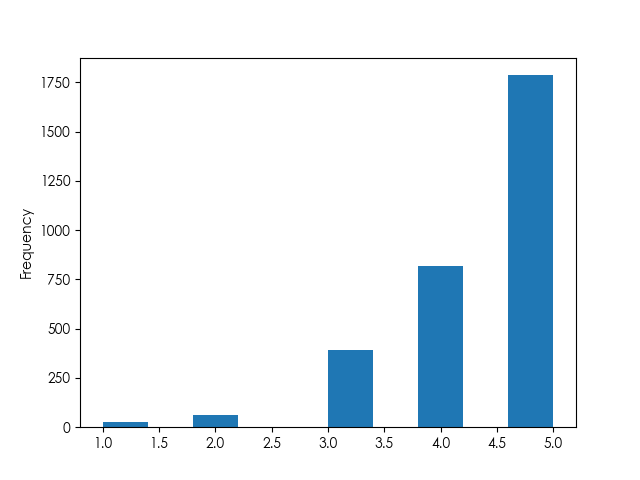

In [297]:
f,ax = plt.subplots()
df['rating'].plot.hist(ax=ax)

### Getting the `size` of each rating group:

In [298]:
df.groupby('rating').size()

rating
1.0      28
2.0      61
3.0     391
4.0     820
5.0    1786
dtype: int64

### Having your Pie and eating it

<IPython.core.display.Javascript object>


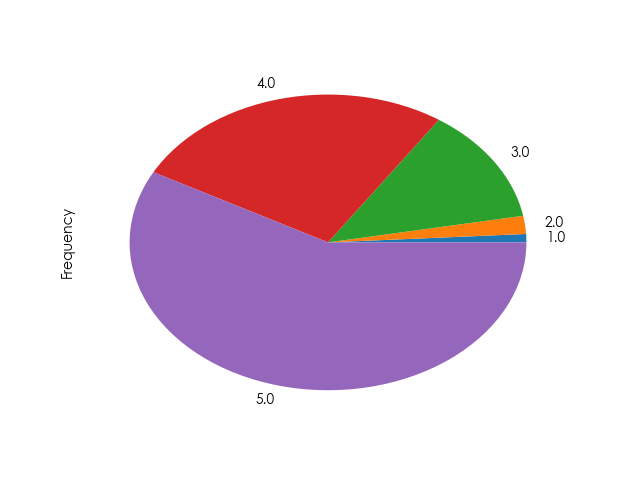

In [299]:
f,ax = plt.subplots()
df.groupby('rating').size().plot.pie(ax=ax, label='Ratings')

## Data Cleaning

* What's necessary and what's not? 
* What's broken/wrong?

In [300]:
df.head()

,buildingid,establishmentaddressline1,establishmentaddressline2,establishmentaddressline3,establishmentaddressline4,establishmentname,inspectiondate,latitude,longitude,postcode,rating
0,185003495,,,1 Corry Place,Belfast,Heyn Group,2012-08-23T00:00:00,375525,334581,BT3 9AH,5.0
1,185746347,Rosemary Presbyterian Church,,26-36 North Circular Road,Belfast,Rosemary Lunch Club,2014-10-21T00:00:00,378213,332938,BT15 5HD,5.0
2,185001807,,,37 Montgomery Street,Belfast,John Ross & Co Auctioneers,2015-03-19T00:00:00,373992,334055,BT1 4NX,4.0
3,185000821,,,108 Donegall Street,Belfast,The Maverick/Boom Box,2014-11-03T00:00:00,374852,333733,BT1 2GX,5.0
4,187129705,,,1 Union Street,,Maverick,2014-02-13T00:00:00,378435,281262,BT1 2JF,4.0


In [301]:
# BORING
df.drop('buildingid', axis=1, inplace=True)

In [302]:
# REDUNDANT
for c in df.keys():
    print(c, c.replace('establishment',''))

establishmentaddressline1 addressline1
establishmentaddressline2 addressline2
establishmentaddressline3 addressline3
establishmentaddressline4 addressline4
establishmentname name
inspectiondate inspectiondate
latitude latitude
longitude longitude
postcode postcode
rating rating


In [303]:
replacements = {c: c.replace('establishment','') for c in df.keys()}
replacements

{'establishmentaddressline1': 'addressline1',
 'establishmentaddressline2': 'addressline2',
 'establishmentaddressline3': 'addressline3',
 'establishmentaddressline4': 'addressline4',
 'establishmentname': 'name',
 'inspectiondate': 'inspectiondate',
 'latitude': 'latitude',
 'longitude': 'longitude',
 'postcode': 'postcode',
 'rating': 'rating'}

In [304]:
df.rename(columns=replacements, inplace=True)
df.head()

,addressline1,addressline2,addressline3,addressline4,name,inspectiondate,latitude,longitude,postcode,rating
0,,,1 Corry Place,Belfast,Heyn Group,2012-08-23T00:00:00,375525,334581,BT3 9AH,5.0
1,Rosemary Presbyterian Church,,26-36 North Circular Road,Belfast,Rosemary Lunch Club,2014-10-21T00:00:00,378213,332938,BT15 5HD,5.0
2,,,37 Montgomery Street,Belfast,John Ross & Co Auctioneers,2015-03-19T00:00:00,373992,334055,BT1 4NX,4.0
3,,,108 Donegall Street,Belfast,The Maverick/Boom Box,2014-11-03T00:00:00,374852,333733,BT1 2GX,5.0
4,,,1 Union Street,,Maverick,2014-02-13T00:00:00,378435,281262,BT1 2JF,4.0


In [305]:
# Something doesn't look right...
df.dtypes

addressline1       object
addressline2       object
addressline3       object
addressline4       object
name               object
inspectiondate     object
latitude           object
longitude          object
postcode           object
rating            float64
dtype: object

In [308]:
df['inspectiondate'] = pd.to_datetime(df['inspectiondate'])
df.head()

,addressline1,addressline2,addressline3,addressline4,name,inspectiondate,latitude,longitude,postcode,rating,dayssinceinspection
0,,,1 Corry Place,Belfast,Heyn Group,2012-08-23,375525,334581,BT3 9AH,5.0,1887 days
1,Rosemary Presbyterian Church,,26-36 North Circular Road,Belfast,Rosemary Lunch Club,2014-10-21,378213,332938,BT15 5HD,5.0,1098 days
2,,,37 Montgomery Street,Belfast,John Ross & Co Auctioneers,2015-03-19,373992,334055,BT1 4NX,4.0,949 days
3,,,108 Donegall Street,Belfast,The Maverick/Boom Box,2014-11-03,374852,333733,BT1 2GX,5.0,1085 days
4,,,1 Union Street,,Maverick,2014-02-13,378435,281262,BT1 2JF,4.0,1348 days


### Calculate days since last inspection

In [309]:
df['dayssinceinspection']=pd.to_datetime('now').date()- df['inspectiondate']
df[['name','inspectiondate','dayssinceinspection']].head()

,name,inspectiondate,dayssinceinspection
0,Heyn Group,2012-08-23,1887 days
1,Rosemary Lunch Club,2014-10-21,1098 days
2,John Ross & Co Auctioneers,2015-03-19,949 days
3,The Maverick/Boom Box,2014-11-03,1085 days
4,Maverick,2014-02-13,1348 days


In [315]:
df.dayssinceinspection.describe()

count                         3097
mean     1109 days 09:09:07.497578
std       303 days 12:53:26.331291
min              650 days 00:00:00
25%              878 days 00:00:00
50%             1063 days 00:00:00
75%             1260 days 00:00:00
max             3730 days 00:00:00
Name: dayssinceinspection, dtype: object

In [317]:
df.sort_values(by='dayssinceinspection', ascending=False).head()

,addressline1,addressline2,addressline3,addressline4,name,inspectiondate,latitude,longitude,postcode,rating,dayssinceinspection
239,,,214 Antrim Road,Belfast,MCCRACKENS B&B,2007-08-07,376040,333301,BT15 2AN,4.0,3730 days
2100,,,5 Corry Place,Belfast,Port Health,2008-09-01,375405,334543,BT3 9HY,5.0,3339 days
2190,,Dunmurry,144 Laurelbank,,NICHOLAS RULES MOBILE VAN,2009-09-09,369869,327711,BT17 0RX,5.0,2966 days
3027,Clifton House,,2 North Queen Street,Belfast,Helm Housing,2011-07-20,375111,333607,BT15 1EQ,5.0,2287 days
1975,,Castlereagh,19 Castlehill Farm,,YUMMIE TREATS,2011-08-17,371496,338183,BT5 7GU,5.0,2259 days


In [330]:
df.sort_values(by='dayssinceinspection', ascending=False).iloc[0]

addressline1                              
addressline2                              
addressline3               214 Antrim Road
addressline4                       Belfast
name                        MCCRACKENS B&B
inspectiondate         2007-08-07 00:00:00
latitude                            376040
longitude                           333301
postcode                          BT15 2AN
rating                                   4
dayssinceinspection     3730 days 00:00:00
Name: 239, dtype: object

<IPython.core.display.Javascript object>


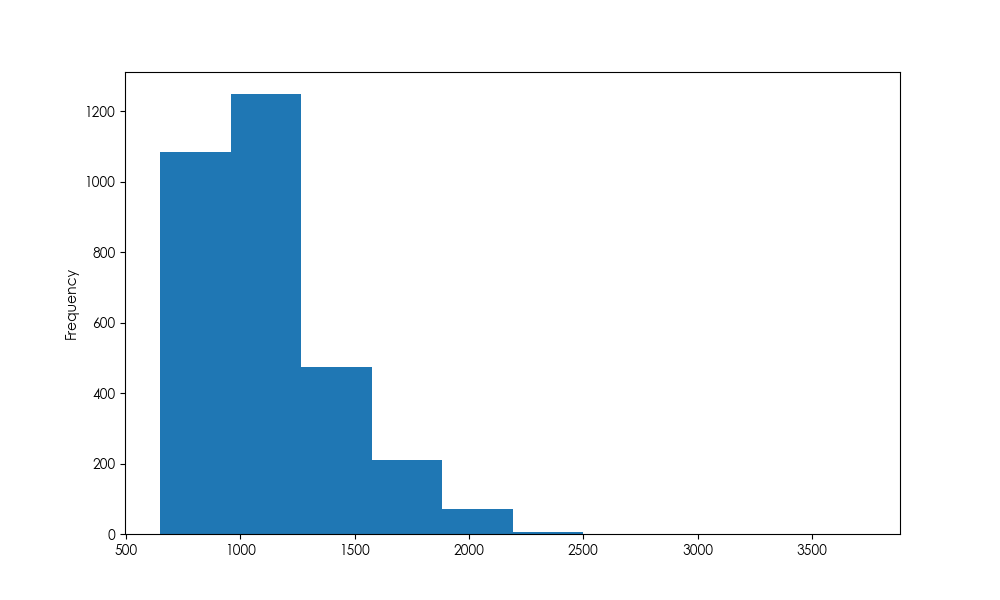

In [314]:
f,ax = plt.subplots(figsize=graph_figsize)
df.dayssinceinspection.dt.days.plot.hist(ax=ax)

<IPython.core.display.Javascript object>


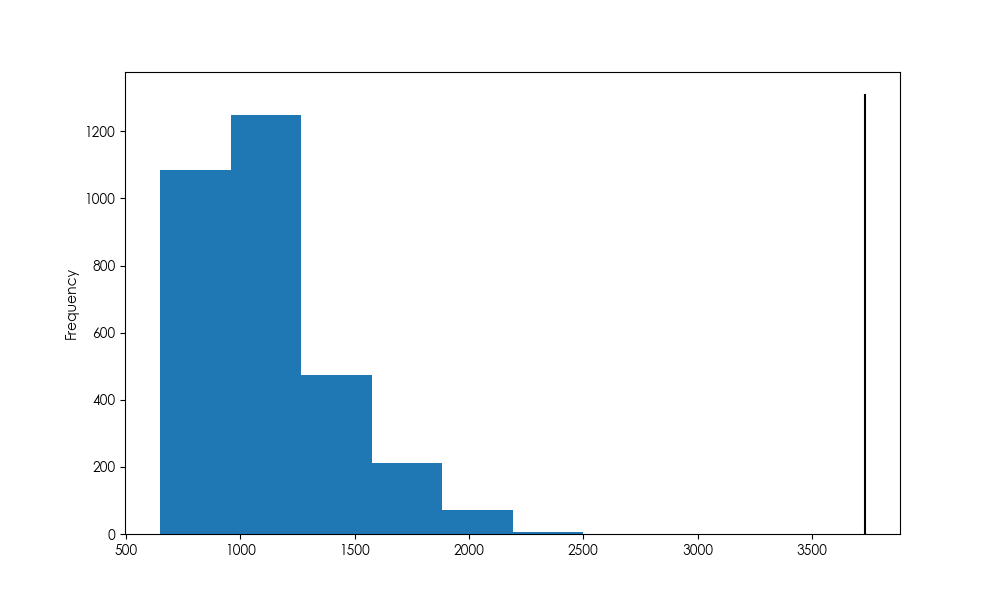

In [331]:
f,ax = plt.subplots(figsize=graph_figsize)
df.dayssinceinspection.dt.days.plot.hist(ax=ax)
first_inspection = df.sort_values(by='dayssinceinspection', ascending=False).iloc[0]
ax.vlines(first_inspection.dayssinceinspection.days, *ax.get_ylim())

In [224]:
# Data Cleaning
df.groupby('name').size().sort_values(ascending=False).head()

name
Subway       23
Spar         20
Winemark     18
Mace         15
Wineflair    13
dtype: int64

## Extra Time? Location Mapping
That's some awful strange looking latitude / longitude

In [225]:
df.head()

,addressline1,addressline2,addressline3,addressline4,name,inspectiondate,latitude,longitude,postcode,rating,dayssinceinspection
0,,,1 Corry Place,Belfast,Heyn Group,2012-08-23,375525,334581,BT3 9AH,5.0,1887 days
1,Rosemary Presbyterian Church,,26-36 North Circular Road,Belfast,Rosemary Lunch Club,2014-10-21,378213,332938,BT15 5HD,5.0,1098 days
2,,,37 Montgomery Street,Belfast,John Ross & Co Auctioneers,2015-03-19,373992,334055,BT1 4NX,4.0,949 days
3,,,108 Donegall Street,Belfast,The Maverick/Boom Box,2014-11-03,374852,333733,BT1 2GX,5.0,1085 days
4,,,1 Union Street,,Maverick,2014-02-13,378435,281262,BT1 2JF,4.0,1348 days


# The Irish Grid
![](grid.jpg)

### Grid Example
[https://irish.gridreferencefinder.com/](https://irish.gridreferencefinder.com/)
![](map.png)

In [226]:
from pyproj import Proj, transform
prj_wgs = Proj(proj='latlong',datum='WGS84')
prj_itm = Proj(init='EPSG:29903')

def reproject_itm_to_wgs(eastings, northings):
    long, lat = transform(prj_itm, prj_wgs, eastings, northings)
    return long, lat
reproject_itm_to_wgs(334581,375525)

(-5.917804141875383, 54.61000494684366)

In [227]:
df.rename(columns={'longitude':'eastings','latitude':'northings'}, inplace=True)
df.head()

,addressline1,addressline2,addressline3,addressline4,name,inspectiondate,northings,eastings,postcode,rating,dayssinceinspection
0,,,1 Corry Place,Belfast,Heyn Group,2012-08-23,375525,334581,BT3 9AH,5.0,1887 days
1,Rosemary Presbyterian Church,,26-36 North Circular Road,Belfast,Rosemary Lunch Club,2014-10-21,378213,332938,BT15 5HD,5.0,1098 days
2,,,37 Montgomery Street,Belfast,John Ross & Co Auctioneers,2015-03-19,373992,334055,BT1 4NX,4.0,949 days
3,,,108 Donegall Street,Belfast,The Maverick/Boom Box,2014-11-03,374852,333733,BT1 2GX,5.0,1085 days
4,,,1 Union Street,,Maverick,2014-02-13,378435,281262,BT1 2JF,4.0,1348 days


In [228]:
def apply_itm_to_wgs(row):
    eastings, northings = row['eastings'], row['northings']
    if eastings is not None and northings is not None: 
        long,lat = transform(prj_itm, prj_wgs, eastings, northings)
    else:
        long,lat = None,None
        
    return pd.Series({'latitude':lat,'longitude':long})

lats_n_longs = df[['eastings','northings']].apply(apply_itm_to_wgs, axis=1)
lats_n_longs.head(10)

,latitude,longitude
0,54.610005,-5.917804
1,54.634570,-5.941997
2,54.596383,-5.926639
3,54.604188,-5.931226
4,54.647520,-6.741936
5,54.581714,-5.947958
6,54.628103,-5.939474
7,NaN,NaN
8,54.603692,-5.931607
9,54.610187,-5.963893


In [229]:
try:
    df = df.join(lats_n_longs)
except ValueError:
    # Gets thrown if I accidently run this twice
    pass
df.head()

,addressline1,addressline2,addressline3,addressline4,name,inspectiondate,northings,eastings,postcode,rating,dayssinceinspection,latitude,longitude
0,,,1 Corry Place,Belfast,Heyn Group,2012-08-23,375525,334581,BT3 9AH,5.0,1887 days,54.610005,-5.917804
1,Rosemary Presbyterian Church,,26-36 North Circular Road,Belfast,Rosemary Lunch Club,2014-10-21,378213,332938,BT15 5HD,5.0,1098 days,54.634570,-5.941997
2,,,37 Montgomery Street,Belfast,John Ross & Co Auctioneers,2015-03-19,373992,334055,BT1 4NX,4.0,949 days,54.596383,-5.926639
3,,,108 Donegall Street,Belfast,The Maverick/Boom Box,2014-11-03,374852,333733,BT1 2GX,5.0,1085 days,54.604188,-5.931226
4,,,1 Union Street,,Maverick,2014-02-13,378435,281262,BT1 2JF,4.0,1348 days,54.647520,-6.741936


## Maps!

<IPython.core.display.Javascript object>


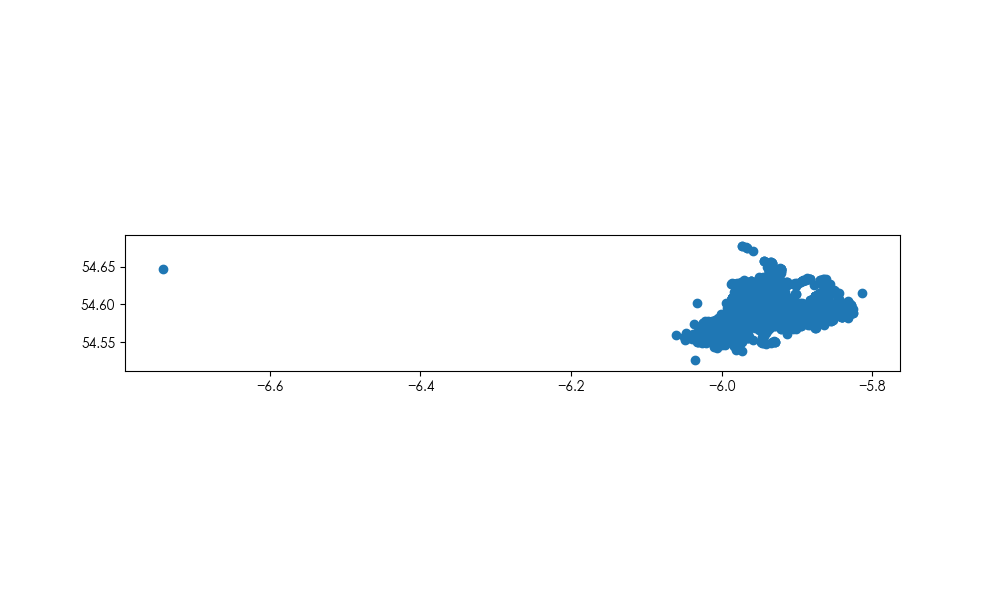

In [230]:
import geopandas as gp
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
_df = df.drop(['longitude','latitude'], axis=1)
crs = {'init': 'epsg:4326'}
gdf=gp.GeoDataFrame(_df, crs=crs, geometry=geometry)
gdf.plot(figsize=graph_figsize)

## Get Open Data Shape File to give a meaningful map of NI
[Search for "Shapefile" on OpendataNI](https://www.opendatani.gov.uk/dataset/osni-open-data-largescale-boundaries-ni-outline1/resource/7e384dd8-3a59-4ae9-be59-386d80fa4db3) (Also in this repo too)

<IPython.core.display.Javascript object>


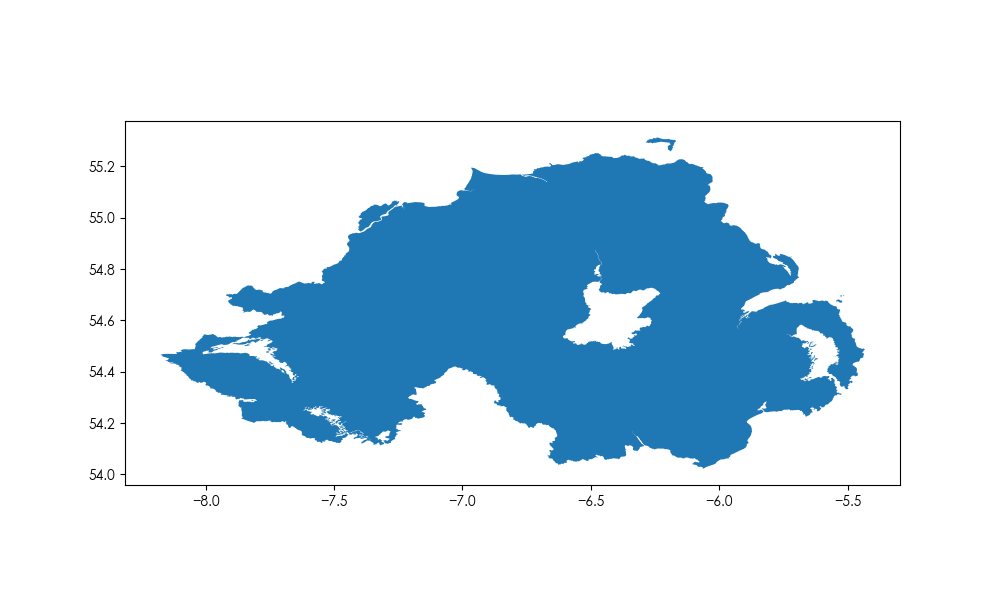

In [332]:
base_map=gp.GeoDataFrame.from_file("OSNI_Open_Data_Largescale_Boundaries__NI_Outline.shp")
base_map.plot(figsize=graph_figsize)

<IPython.core.display.Javascript object>


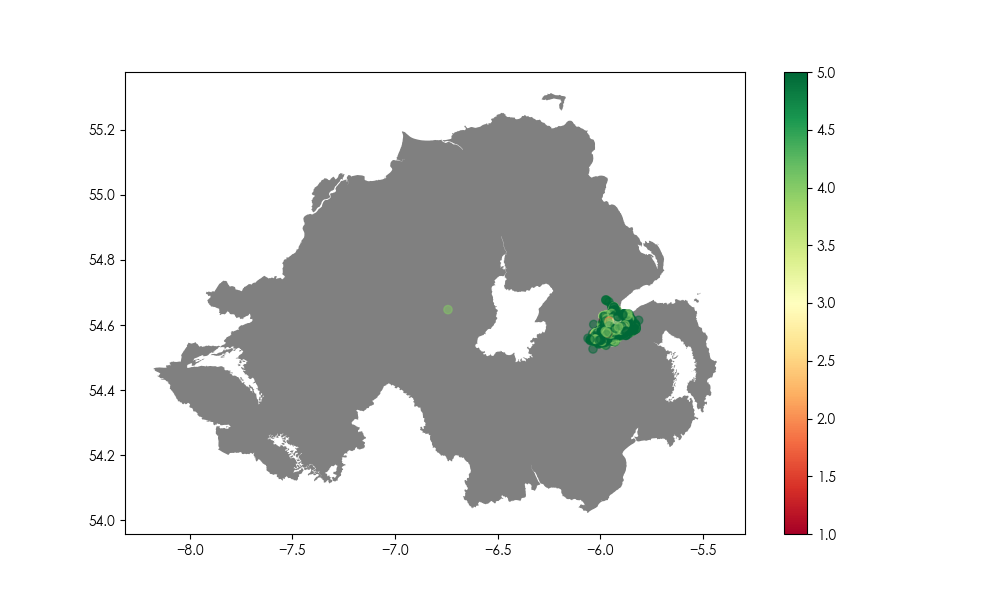

In [232]:
f,ax = plt.subplots(figsize=graph_figsize)
base_map.plot(ax=ax, color='gray')
gdf.dropna().plot(column='rating',ax=ax, alpha=0.5, legend=True, cmap='RdYlGn')

In [233]:
min_max = df[['latitude','longitude']].agg(['min','max'])
min_max

,latitude,longitude
min,54.526609,-6.741936
max,54.677225,-5.813576


<IPython.core.display.Javascript object>


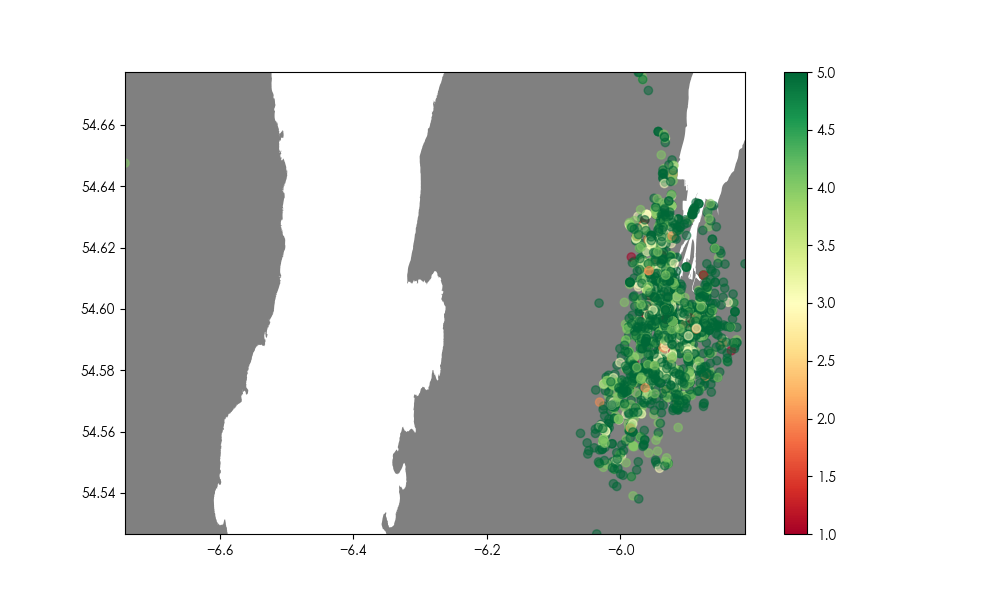

(54.52660878238531, 54.677224685037167)

In [234]:
f,ax = plt.subplots(figsize=graph_figsize)
base_map.plot(ax=ax, color='gray')
gdf.dropna().plot(column='rating',ax=ax, alpha=0.5, legend=True, cmap='RdYlGn')
ax.set_xlim(min_max['longitude'].values)
ax.set_ylim(min_max['latitude'].values)

<IPython.core.display.Javascript object>


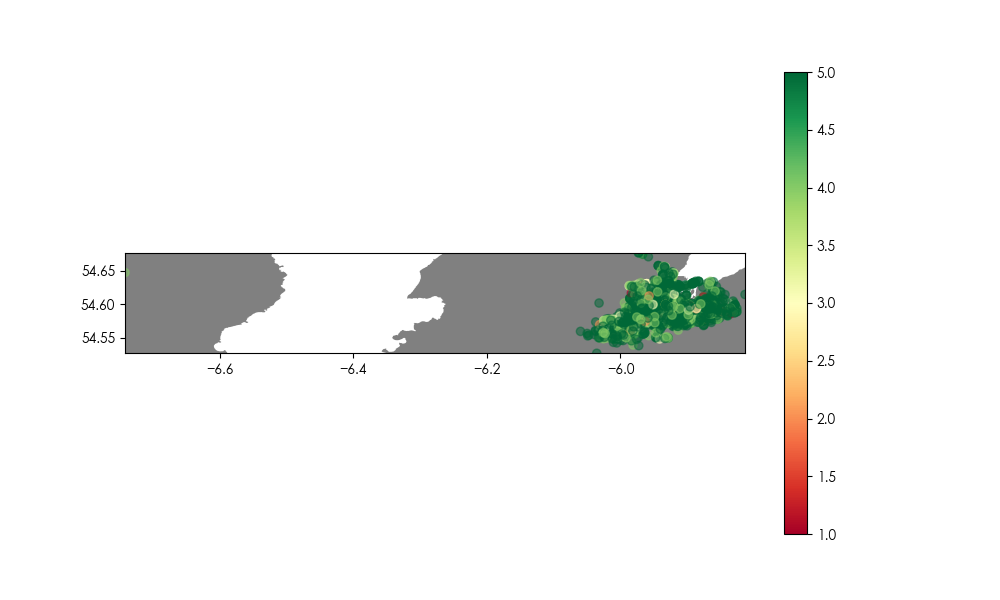

In [235]:
f,ax = plt.subplots(figsize=graph_figsize)
base_map.plot(ax=ax, color='gray')
gdf.dropna().plot(column='rating',ax=ax, alpha=0.5, legend=True, cmap='RdYlGn')
ax.set_xlim(min_max['longitude'].values)
ax.set_ylim(min_max['latitude'].values)
ax.set_aspect('equal')

In [236]:
percentiles = df[['latitude','longitude']].quantile([0.01,0.99])
percentiles

,latitude,longitude
0.01,54.550063,-6.026184
0.99,54.644132,-5.840460


<IPython.core.display.Javascript object>


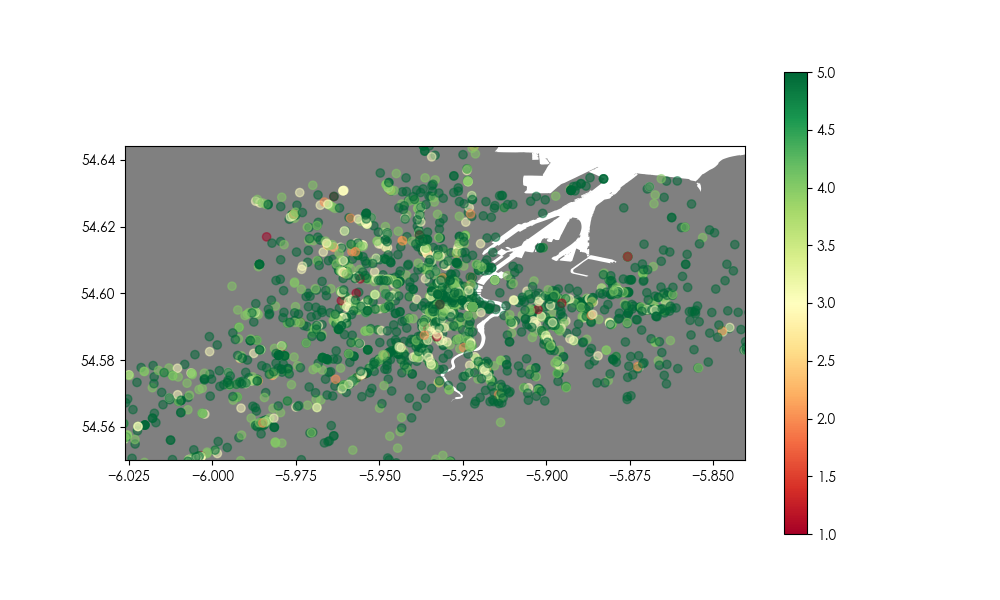

In [237]:
f,ax = plt.subplots(figsize=graph_figsize)
base_map.plot(ax=ax, color='gray')
gdf.dropna().plot(column='rating',ax=ax, alpha=0.5, legend=True, cmap='RdYlGn')
ax.set_xlim(percentiles['longitude'].values)
ax.set_ylim(percentiles['latitude'].values)
ax.set_aspect('equal')


# Challenges / Remainder of Workshop / "Homework"
* Find out what the outlier location was using whatever method you like
* Look through [OpenDataNI](https://www.opendatani.gov.uk/dataset) Datasets
* Pick one to analyse
* (If it's crap, pick another one)
* Make One Graph that combines two measurements (i.e. position + rating as before, or rating + last-inspection)
* Check out the [dataset suggestions currently open](https://www.opendatani.gov.uk/datarequest?state=open)
* Find one you would be interested in analysing, and comment on what you think you could do with it or how you would combine it with other datasets

**Bonus Round**
If there's something you think government *has* that you *want* and haven't *seen*, request it.